<a href="https://colab.research.google.com/github/AniketRao/Wiscosin-Breast-Cancer-Detection/blob/main/Wiscosin_Breast_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   #                              WISCOSIN BREAST CANCER DETECTION.

# 1.Description


This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

   **1.1. CONTEXT**

1.It is important for an Medical Hospital's to diagonose a Breast Cancer Patients having class M= malignant or B =Benign for an immediate treatment on the respective class

2.The data set contains features of the Breast Cancer put forth by  University of Wisconsin Hospitals.



**1.2.  PROBLEM STATEMENT**

Classify the class of Brest Cancer Malignant Or Benign 

**1.3. Real-world/Business objective and constraints**

1.No Latency requirement

2.Errors can be very costly

# 2. Machine Learning Problem Formulation

**2.1 DATA**

**2.1 DATA OVERVIEW**

1.Source:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data\  

2.We have data file that contains the information about the features and class of Breat Cancer

3.Data file's Information:

*Wiscosin Breast Cancer.csv(radius_mean,texture_mean,perimeter_mean,.....,class)

* It contains only numerical input variables

**2.2 Mapping the Real World Problem to Machine Learning**

**2.2.1. Type of Machine Learning Problem**

There are two different classes of Breast Cancer which can be clasified into = classification problem.

**2.2.2. Performamce Matrix**

Source:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data   

Metric(s): 

**f1-score**

 **Confusion Matrix**

**2.2.3. Machine Learning Objective and Constraints**

Objective: Predict which of the two classes the data point belongs to.

CONSTRAINTS:

1.Intepretability.

2.Erros can be costly



# 3. Data Preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading of Data Set

In [ ]:
data=pd.read_csv('/content/Wiscosin breast cancer.csv')
print(data)

           id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop('Unnamed: 32', axis=1 , inplace=True)

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# 4. Exploratory Data Analysis.


In [ ]:
# UNIVARIATE ANALYSIS

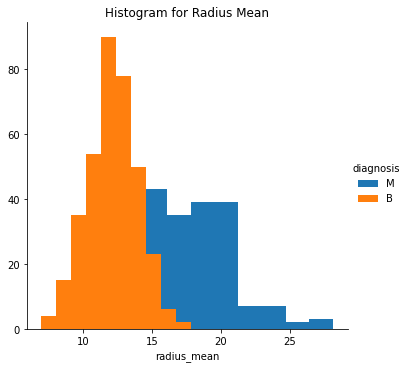

In [ ]:
sns.FacetGrid(data,hue='diagnosis',height=5)\
  .map(plt.hist,'radius_mean')\
  .add_legend();
plt.title('Histogram for Radius Mean')

plt.show()

**Radius Mean range between 6 to 16 are of Benign Variant.\
Radius Mean range between 16 to 28 are of Malignant Variant.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


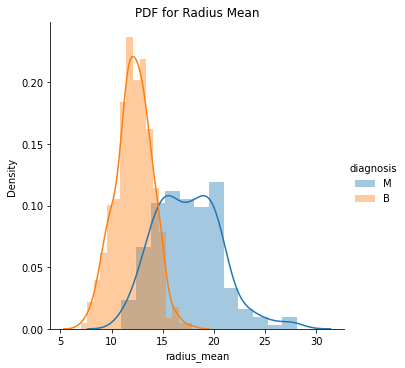

In [ ]:
sns.FacetGrid(data,hue='diagnosis',height=5)\
  .map(sns.distplot,'radius_mean')\
  .add_legend();
plt.title('PDF for Radius Mean')

plt.show()

**Radius Mean range between 6 to 16 are having higher density(no of patients) of Benign Variant.\
Radius Mean range between 09 to 28 are having lower density of Malignant Variant as compared to Benign Variant**.

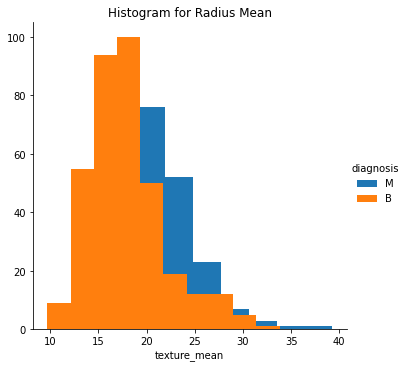

In [ ]:
sns.FacetGrid(data,hue='diagnosis',height=5)\
  .map(plt.hist,'texture_mean')\
  .add_legend();
plt.title('Histogram for Radius Mean')

plt.show()

**More amount of overlapping is seen by considering texture_mean feature for classification.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


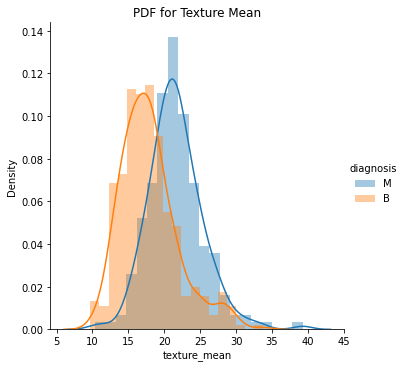

In [ ]:
sns.FacetGrid(data,hue='diagnosis',height=5)\
  .map(sns.distplot,'texture_mean')\
  .add_legend();
plt.title('PDF for Texture Mean')

plt.show()

**Overlapping of points of classes in Texture_mean(feature)**

In [ ]:
#BOX PLOT

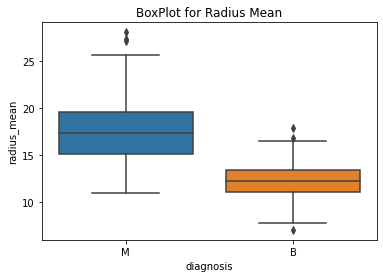

In [ ]:
sns.boxplot(x='diagnosis',y='radius_mean',data=data)
plt.title('BoxPlot for Radius Mean')
plt.show()


**Benign Class= 0 to 100% values range between 6 to 16**\
  (0-25% = 6 to 11 , 25% to 50% = 11 to 12 , 50% to 75% = 12 to 13 , 75% to 100% = 14 to 16)

**Malignant Class= 0 to 100% values range between 11 to 28**\
  (0-25% = 6 to 15 , 25% to 50% = 15 to 17 , 50% to 75% = 17 to 20 , 75% to 100% = 20 to 28)

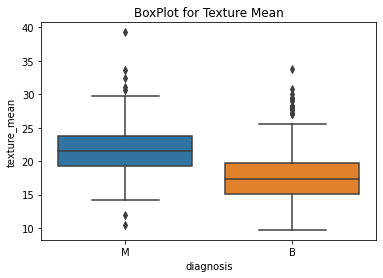

In [ ]:

sns.boxplot(x='diagnosis',y='texture_mean',data=data)

plt.title('BoxPlot for Texture Mean')
plt.show()


**Benign Class= 0 to 100% values range between 09 to 27**\
**Malignant Class= 0 to 100% values range between 14 to 30**\
**More Overlapping is noticed** 

In [ ]:
# VIOLIN PLOT

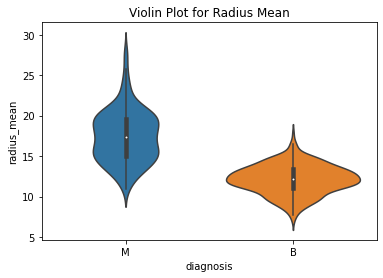

In [ ]:
sns.violinplot(x='diagnosis',y='radius_mean',data=data)
plt.title('Violin Plot for Radius Mean')
plt.show()

**Radius Mean having diamension range 10 to 15 are majorly seen in Benign Class\
Radius Mean having diamension range 14 to 21 are majorly seen in Malignant Class**.

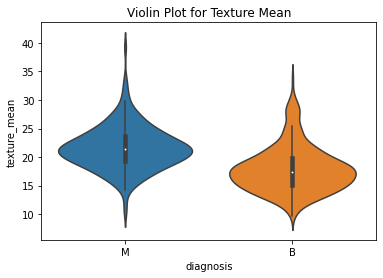

In [ ]:
sns.violinplot(x='diagnosis',y='texture_mean',data=data)
plt.title('Violin Plot for Texture Mean')
plt.show()


**Texture Mean having diamension range 15 to 18 are majorly seen in Benign Class\
Texture Mean having diamension range 19 to 22 are majorly seen in Malignant Class**.

****Bivariate Analysis****

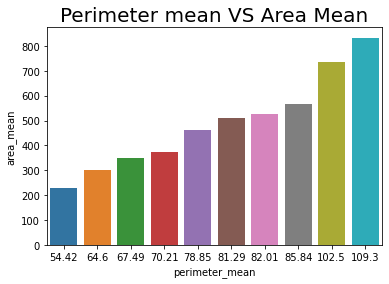

In [ ]:
sns.barplot(x='perimeter_mean',y='area_mean',data=data[170:180])
plt.title('Perimeter mean VS Area Mean',fontsize=20)

plt.show()

**Observation : Unit Increase perimeter mean there is increse of area mean.** 

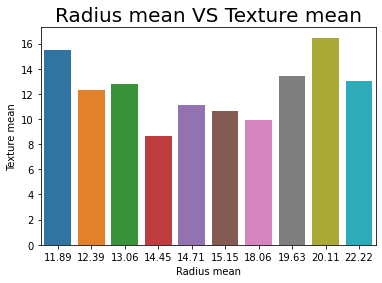

In [ ]:
sns.barplot(x='texture_mean',y='radius_mean',data=data[170:180])
plt.title('Radius mean VS Texture mean',fontsize=20)
plt.xlabel('Radius mean')
plt.ylabel('Texture mean')
plt.show()

In [ ]:
#Scatter Plot

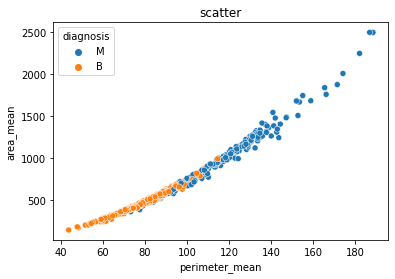

In [ ]:
sns.scatterplot(x='perimeter_mean',y='area_mean',data=data,hue='diagnosis')
plt.title('scatter')
plt.show()


**a = int(input('perimeter_mean')\
b = int(input('area_mean')\
if a<100 and b<700 :\
        print('The class Is Benign')\
 else:\
       print('The class is Malignant')**

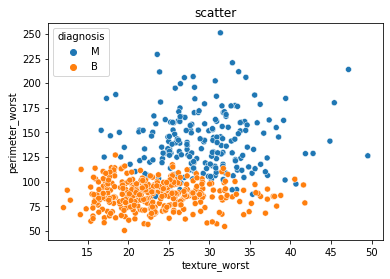

In [ ]:
sns.scatterplot(x='texture_worst',y='perimeter_worst',data=data,hue='diagnosis')
plt.title('scatter')
plt.show()


**a = int(input('texture_mean'),\
b = int(input('perimeter_mean')\
if a<45 and b<115 :\
        print('The class Is Benign')\
 else:\
       print('The class is Malignant')**

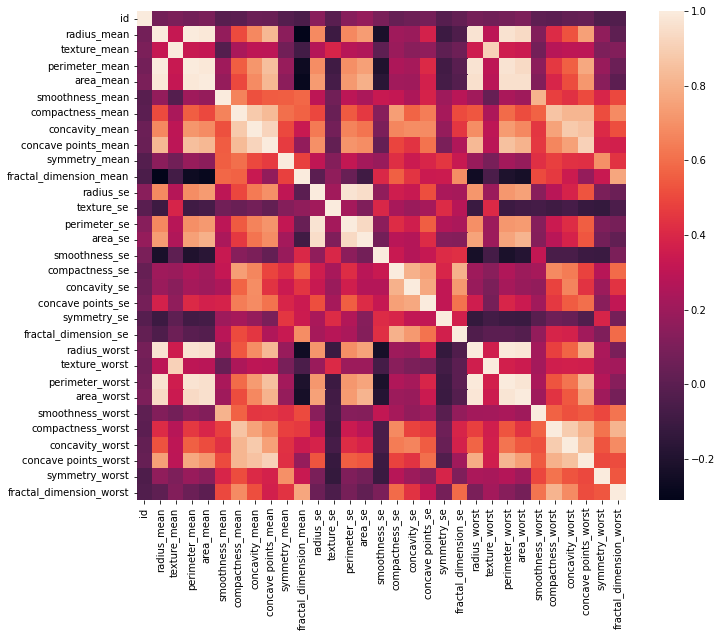

In [ ]:
visual=plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),square=True)
plt.show()

**The Ligheter shade has positive correlation  (area_worst and radius mean,radiusworst and radius mean).\
The Darkest shade has negative correlation(perimeter worst and smoothness_se).**

# 4. Model Training.

****TRAINING AND TESTING DATA****

In [ ]:
#Getting Features

x=data.drop(columns ='diagnosis')

#Getting Predicting Values

y=data['diagnosis']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(len(x_train))

398


In [ ]:
print(len(x_test))

171


In [ ]:
print(len(y_train))

398


In [ ]:
print(len(y_test))

171


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(x_train)
std.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

****01 KNN CLASSIFIER****

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
KNN=KNeighborsClassifier()
para_meter={'n_neighbors':[3,5,7,10,15,25,50,100],
            'weights':['uniform', 'distance'],
            'algorithm':['auto']
            
}

rsv=RandomizedSearchCV(KNN,para_meter)
rsv.fit(x_train,y_train)

CPU times: user 331 ms, sys: 3.51 ms, total: 334 ms
Wall time: 337 ms


In [ ]:
rsv.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
rsv.best_score_

0.7712974683544304

In [ ]:
%%time
KNN=KNeighborsClassifier(weights ='distance',
 n_neighbors= 3,
 algorithm= 'auto')
KNN.fit(x_train,y_train)

CPU times: user 4.24 ms, sys: 0 ns, total: 4.24 ms
Wall time: 6.84 ms


In [ ]:
#model prediction
y_pred = KNN.predict(x_test)


In [ ]:
# Adding all metrics for calculation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# Accuracy score of train and test data
print("Train Data",KNN.score(x_train,y_train)*100)
print("Test Data",KNN.score(x_test,y_test)*100)

Train Data 100.0
Test Data 78.3625730994152


In [ ]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[102   6]
 [ 31  32]]


In [ ]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.77      0.94      0.85       108
           M       0.84      0.51      0.63        63

    accuracy                           0.78       171
   macro avg       0.80      0.73      0.74       171
weighted avg       0.79      0.78      0.77       171



**Test Accuracy obtained from KNN is 78.36%**

**2.DECISION TREE**

In [ ]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

dt=DecisionTreeClassifier()

parameter={'criterion':['gini'],
            'splitter': ['best','random'],
           'max_depth':[2,10,20,25,40,None],
           'min_samples_split':[2,4,5,10,12],
           'min_samples_leaf':[1,2,3,6]}
            
rv=RandomizedSearchCV(dt,parameter)
rv.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [ ]:
rv.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'splitter': 'random'}

In [ ]:
rv.best_score_

0.937246835443038

In [ ]:
dt=DecisionTreeClassifier(criterion ='gini',
 max_depth= 20,
 min_samples_leaf= 1,
 min_samples_split= 10,
 splitter= 'best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predicting testing data
y_pred=dt.predict(x_test)

In [ ]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,dt.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,dt.predict(x_test))*100)

Train Data Score 98.74371859296483
Test Data Score 90.64327485380117


In [ ]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[96 12]
 [ 4 59]]


In [ ]:
# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.96      0.89      0.92       108
           M       0.83      0.94      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



**Test Accuracy obtained from DECISION TREE CLAASIFIER is 90.64%**

****03 Random Forest Classifier****

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_class=RandomForestClassifier()

para_meter={'n_estimators':[100,200,300,500],
            'criterion':['gini'],
            'max_depth':[3,5,10,None],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[1,2,3,4]
    
}

rsv=RandomizedSearchCV(random_class,para_meter,n_jobs=-1)
rsv.fit(x_train,y_train)


CPU times: user 970 ms, sys: 48.7 ms, total: 1.02 s
Wall time: 23 s


In [ ]:
rsv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
rsv.best_score_

0.9498101265822785

In [ ]:
random_class=RandomForestClassifier(n_estimators= 200,
 min_samples_split=2,
 min_samples_leaf=1,
 max_depth= 5,
 criterion= 'gini')
random_class.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=random_class.predict(x_test)

In [ ]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,random_class.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,random_class.predict(x_test))*100)

Train Data Score 99.2462311557789
Test Data Score 95.90643274853801


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[104   4]
 [  3  60]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97       108
           M       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Test Accuracy obtained from RANDOM FOREST CLAASIFIER is 95.90%**

**04. LOGISTIC REGRESSION**

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_reg=LogisticRegression()

parametre={
    'penalty':['l2'],
    'C':[1.0,2.0,3.0,4.0],
    'random_state':[None],
    'solver':['lbfgs'],
    'max_iter':[100,400,600,1000,5000]
}

rv=RandomizedSearchCV(log_reg,parametre)
rv.fit(x_train,y_train)


CPU times: user 505 ms, sys: 395 ms, total: 900 ms
Wall time: 473 ms


In [ ]:
rv.best_params_

{'C': 4.0,
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs'}

In [ ]:
rv.best_score_

0.625632911392405

In [ ]:
%%time
log_reg=LogisticRegression(solver='lbfgs',
 random_state= None,
 penalty= 'l2',
 max_iter= 1000,
 C= 4.0)

log_reg.fit(x_train,y_train)

CPU times: user 7.03 ms, sys: 8.29 ms, total: 15.3 ms
Wall time: 10.9 ms


In [ ]:
y_pred=log_reg.predict(x_test)

In [ ]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,log_reg.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,log_reg.predict(x_test))*100)

Train Data Score 62.562814070351756
Test Data Score 63.1578947368421


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[108   0]
 [ 63   0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Test Accuracy obtained from LOGISTIC REGRESSION is 63.15%**

**05.SUPPORT VECTOR MACHINE**

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV  

svc=SVC()

para= {'kernel': [ 'rbf', ], 
                  'C': [1,100,2],
                'max_iter': [1000,100000]}
gs=GridSearchCV(svc,para)
gs.fit(x_train,y_train)
    

CPU times: user 360 ms, sys: 40.6 ms, total: 401 ms
Wall time: 364 ms


In [ ]:
gs.best_params_

{'C': 100, 'kernel': 'rbf', 'max_iter': 1000}

In [ ]:
gs.best_score_

0.6256645569620254

In [ ]:
%%time
svc=SVC(C= 100,
 kernel='rbf',
 max_iter=1000,
 )
svc.fit(x_train,y_train)

CPU times: user 16.5 ms, sys: 57 µs, total: 16.5 ms
Wall time: 17.9 ms


In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,svc.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,svc.predict(x_test))*100)

Train Data Score 63.06532663316583
Test Data Score 62.57309941520468


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[107   1]
 [ 63   0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.63      0.99      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.40      0.63      0.49       171



**Test Accuracy obtained from SUPPORT VECTOR MACHINE CLAASIFIER is 62.57%**

# 06.Conclusion

**Test Accuracy obtained from KNN is 78.36%**

**Test Accuracy obtained from DECISION TREE CLAASIFIER is 90.64%**

**Test Accuracy obtained from RANDOM FOREST CLAASIFIER is 95.90%**

**Test Accuracy obtained from LOGISTIC REGRESSION is 63.15%**

**Test Accuracy obtained from SUPPORT VECTOR MACHINE CLAASIFIER is 62.57%**



